In [1]:
import numpy as np
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt

df=pd.read_csv(r'c:\datasets\data.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
x=df.drop(['street','city','statezip','country','price','date'],axis=1) #removing target and coloumns with characters and 
y=df['price']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

print("mse before augmentation:",mean_squared_error(y_test,y_pred))

df_augmented=df.copy()
noise_factor=0.01

for col in ['sqft_living', 'sqft_lot','sqft_above','sqft_basement']:
    noise=np.random.normal(0,noise_factor*df[col].std(),size=len(df))
    df_augmented[col] += noise

df_final=pd.concat([df,df_augmented],ignore_index=True)

x_aug=df_final.drop(['street','city','statezip','country','price','date'],axis=1) #removing target and coloumns with characters and 
y_aug=df_final['price']

x_train_aug,x_test_aug,y_train_aug,y_test_aug=train_test_split(x_aug,y_aug,test_size=0.3,random_state=1)

model=LinearRegression()
model.fit(x_train_aug,y_train_aug)
y_pred_aug=model.predict(x_test_aug)

print("mse after augmentation:",mean_squared_error(y_test_aug,y_pred_aug))






mse before augmentation: 69873795408.6342
mse after augmentation: 67204058465.894905


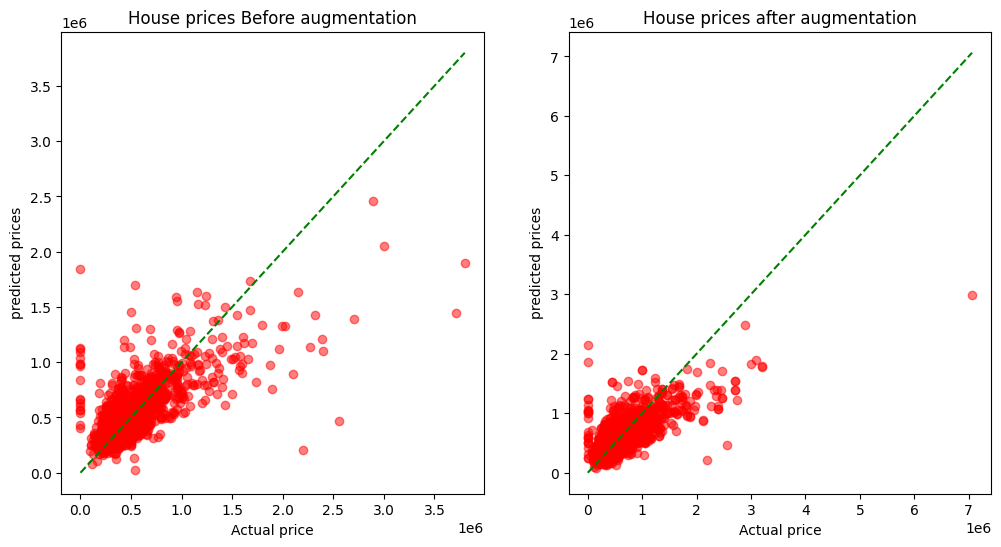

In [24]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(y_test,y_pred,color='red',alpha=0.5)
plt.plot((y_test.min(),y_test.max()),(y_test.min(),y_test.max()),'g--')
plt.xlabel("Actual price")
plt.ylabel("predicted prices")
plt.title("House prices Before augmentation")

plt.subplot(1,2,2)
plt.scatter(y_test_aug,y_pred_aug,color='red',alpha=0.5)
plt.plot((y_test_aug.min(),y_test_aug.max()),(y_test_aug.min(),y_test_aug.max()),'g--')
plt.xlabel("Actual price")
plt.ylabel("predicted prices")
plt.title("House prices after augmentation")
plt.show()